Tasks:	Analyze the Aircrash dataset and find out the following: (Dataset: Airplane_Crashes_Since_1908.csv) <br>
a.	Identification of the most dangerous operator. <br>
b.	Identification of the most often crash cause.  <br>
c.	Is the most often crash cause the most dangerous one as well? If not which one is the most dangerous? <br>
d.	Which variable (day / night, season of the year …)  is the most important for prediction crash cause? <br>
e.	Find any interesting trends/behaviors that you encounter when you analyze the dataset. <br>


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
import warnings
warnings.simplefilter('ignore')

In [35]:
df = pd.read_csv("/content/Airplane_Crashes_Since_1908.csv")

In [36]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


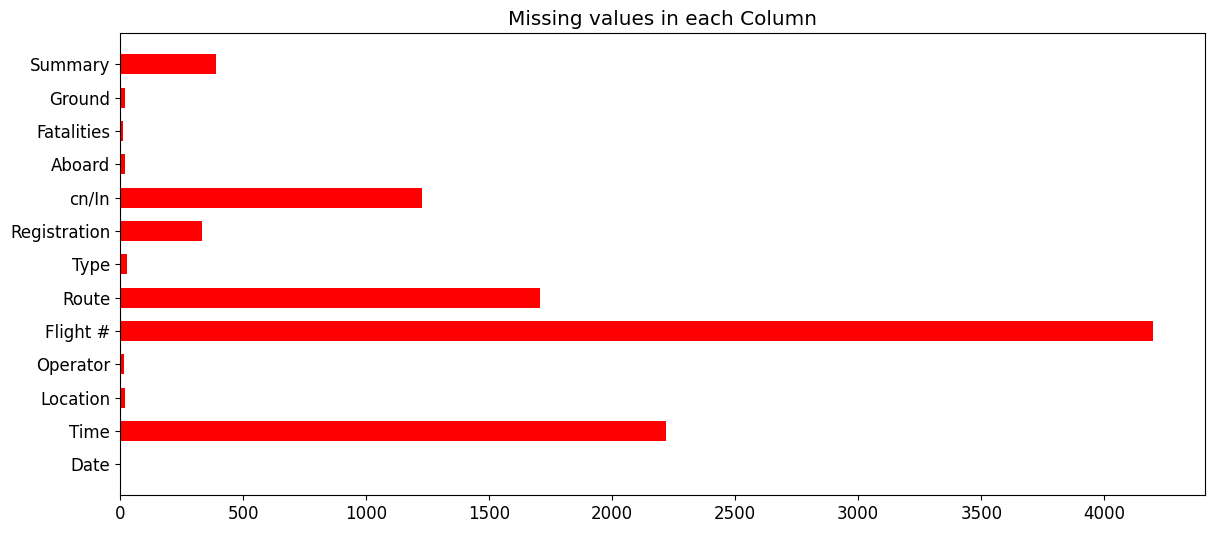

In [38]:
missing_counts = df.isna().sum()

plt.figure(figsize=[14, 6])
plt.barh(missing_counts.index, missing_counts.values, height=0.6, color='red')
plt.title("Missing values in each Column")
plt.rcParams.update({'font.size': 12})
plt.show()

### Feature engineering and filling missing values
For starters, let's create a new column. As can be seen from the 'Operator' column, we can extract useful information about whether the aircraft is military. In my opinion, this is important information that affects the likelihood of a crash, the number of casualties, and other parameters

In [39]:
df["Military"] = df['Operator'].str.contains("Military", case=True)

In [40]:
df['Military'].value_counts()

,count
Military,
False,4469
True,781


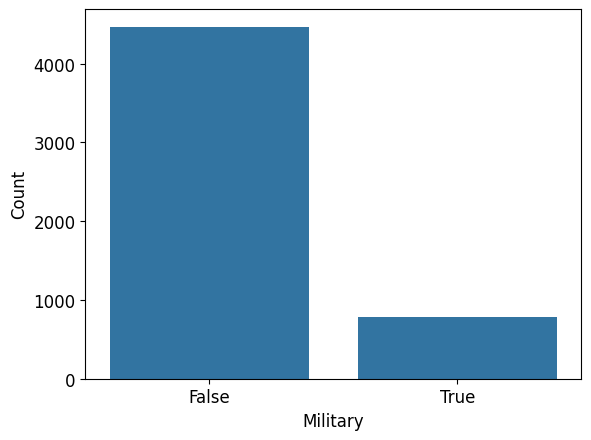

In [41]:
counts = df['Military'].value_counts().reset_index()
counts.columns = ['Military', 'Count']
sns.barplot(x='Military', y='Count', data=counts)
plt.show()

It would also be a good idea to convert the date into a date format and extract the year into a separate column

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df["Year"] = df['Date'].apply(lambda x: x.year)
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Military,Year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",True,1908
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,True,1912
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,False,1913


In [43]:
df['Location'].isna().value_counts()

,count
Location,
False,5248
True,20


In [44]:
df.loc[df['Location'].isna()]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Military,Year
142,1928-05-07,NaN,NaN,Aeropostale,NaN,NaN,Latecoere 26,F-AIMQ,NaN,1.0,1.0,0.0,NaN,False,1928
411,1936-10-09,NaN,NaN,North Sea Aerial and General Transport,NaN,NaN,Blackburn B-2,G-ABWI,NaN,1.0,1.0,0.0,NaN,False,1936
564,1941-10-28,NaN,NaN,Deutsche Lufthansa,NaN,NaN,Junkers JU-53/3m,D-AUXZ,7172,13.0,13.0,0.0,NaN,False,1941
573,1942-02-14,NaN,NaN,China National Aviation Corporation,NaN,NaN,Douglas DC-2,45,NaN,NaN,NaN,NaN,NaN,False,1942
587,1942-08-21,NaN,NaN,Deutsche Lufthansa,NaN,NaN,Siebel Si-204,NaN,NaN,4.0,4.0,0.0,"Lufthansa chairman, Von Gablenz killed.",False,1942
595,1942-10-22,NaN,NaN,Deutsche Lufthansa,7208,NaN,Junkers JU-52/3m,D-AYGX,7208,17.0,17.0,0.0,NaN,False,1942
703,1945-04-20,NaN,NaN,NaN,NaN,NaN,Junkers JU-53/3m,D-ANAJ,NaN,18.0,18.0,0.0,Missing on an evacuation flight from Berlin to...,NaN,1945
903,1947-11-27,NaN,NaN,China National Aviation Corporation,NaN,NaN,Douglas DC-3,NaN,NaN,3.0,2.0,0.0,The cargo plane was shot down by communist ant...,False,1947
1496,1957-09-28,NaN,NaN,British European Airways,NaN,NaN,de Havilland DH-114 Heron,G-AOFY,14099,3.0,3.0,0.0,The pilot did not appreciate that the air ambu...,False,1957
1911,1964-05-27,NaN,NaN,VASP,NaN,Training,Douglas C-47-DL,PP-SPZ,4649,3.0,3.0,0.0,NaN,False,1964


There is no clear option to fill in the country, but more importantly, the percentage of missing data in the overall dataset is so small that the most appropriate solution would be to exclude these records

In [45]:
df.dropna(inplace=True, subset=['Location'])
df['Location'].isna().value_counts()

,count
Location,
False,5248


Now location, as seen in the data, countries are usually separated by commas, so let's try splitting them into a separate column

In [46]:
df['Country'] = df['Location'].str.split(",").str[-1].str.replace(" ", "")
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Military,Year,Country
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",True,1908,Virginia
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,True,1912,NewJersey
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,False,1913,Canada


Aha, and the problem is immediately visible: in the USA, the information refers to the state rather than the country, so we'll need to adjust the result accordingly

In [47]:
state = "Alabama, Alaska, AmericanSamoa, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, DistrictofColumbia,  \
Florida, Georgia, Guam, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan,  \
Minnesota, Minor OutlyingIslands, Mississippi, Missouri, Montana, Nebraska, Nevada, NewHampshire, NewJersey, NewMexico, NewYork,  \
NorthCarolina, NorthDakota, NorthernMarianaIslands, Ohio, Oklahoma, Oregon, Pennsylvania, PuertoRico, Rhode Island, South Carolina, \
South Dakota, Tennessee, Texas, U.S.VirginIslands, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming"
state = pd.Series(state.split(", "))

In [48]:
df.loc[df['Country'].isin(state), 'Country'] = 'USA'
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Military,Year,Country
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",True,1908,USA
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,True,1912,USA
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,False,1913,Canada
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,True,1913,OvertheNorthSea
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,True,1913,Germany


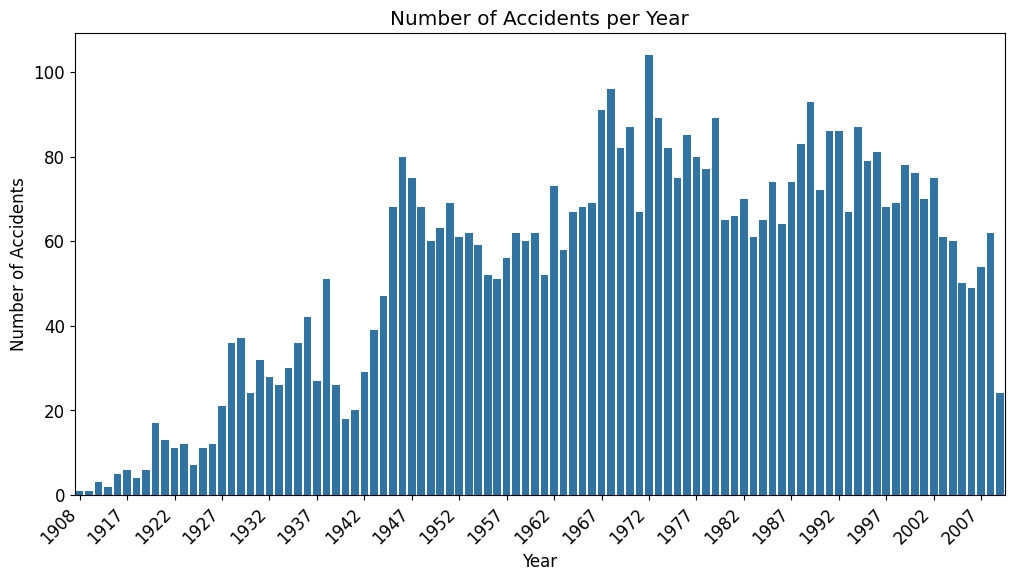

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
years = df['Year'].unique()
n = 5
plt.xticks(np.arange(0, len(years), n), years[::n], rotation=45, ha='right')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

Now let's move on to the first task:
# a) Identification of the most dangerous operator. <br>
First, we'll try a naive solution and see what we get.

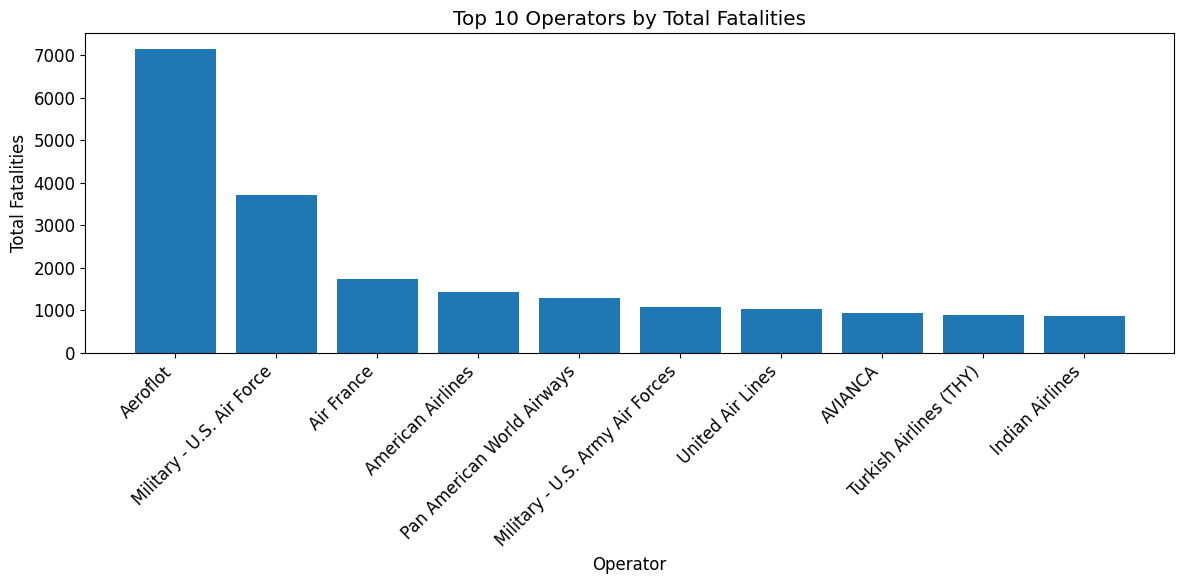

In [50]:
top10_operators = df.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10_operators.index, top10_operators.values)
plt.xlabel("Operator")
plt.ylabel("Total Fatalities")
plt.title("Top 10 Operators by Total Fatalities")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

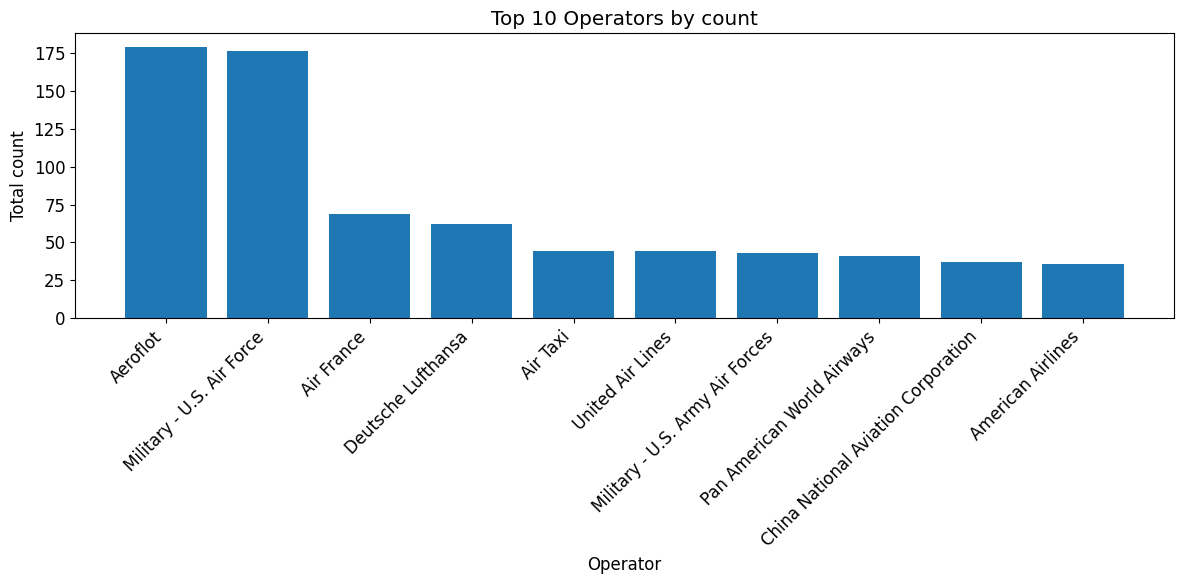

In [51]:
top10_operators = df.groupby('Operator')['Fatalities'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10_operators.index, top10_operators.values)
plt.xlabel("Operator")
plt.ylabel("Total count")
plt.title("Top 10 Operators by count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Aeroflot turned out to be the most frequent, but there's a nuance: this company belonged to two different countries, and in the first one, due to the specifics of the economy, it was a monopoly. We need to check whether there is a bias in the data by year.

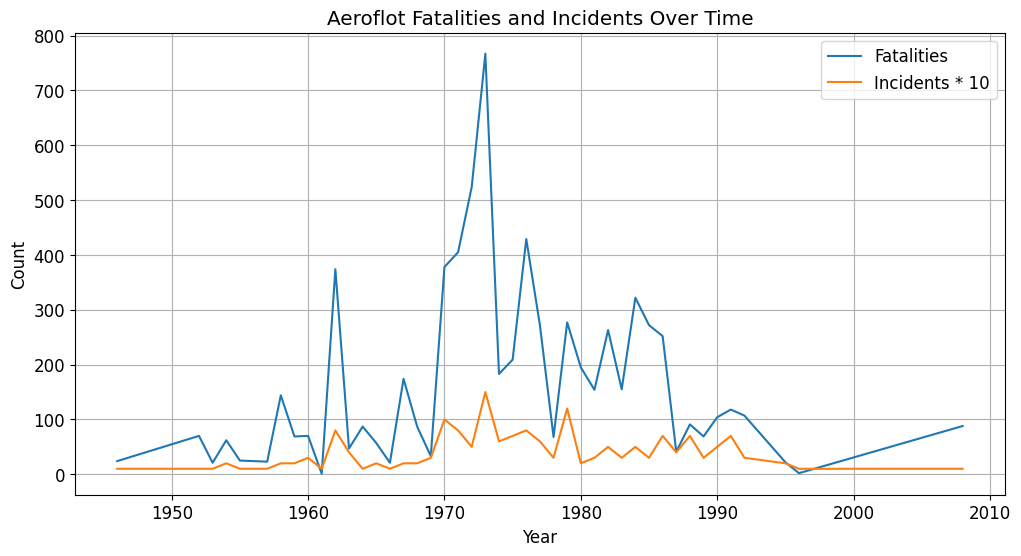

In [52]:
aeroflot_data = df[df['Operator'] == 'Aeroflot']
aeroflot_fatalities = aeroflot_data.groupby('Year')['Fatalities'].sum()
aeroflot_incidents = aeroflot_data.groupby('Year')['Date'].count()
plt.figure(figsize=(12, 6))
plt.plot(aeroflot_fatalities.index, aeroflot_fatalities.values, label='Fatalities')
plt.plot(aeroflot_incidents.index, aeroflot_incidents.values * 10, label='Incidents * 10')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Aeroflot Fatalities and Incidents Over Time")
plt.legend()
plt.grid(True)
plt.show()


Yeah, and it seems that's the case. After the collapse of the USSR, the numbers don’t look as extreme. To determine which operator is the most dangerous at the moment, it would be better to take, for example, the last 20 years (the last 20 in the dataset). This would provide a more relevant picture for making decisions today.

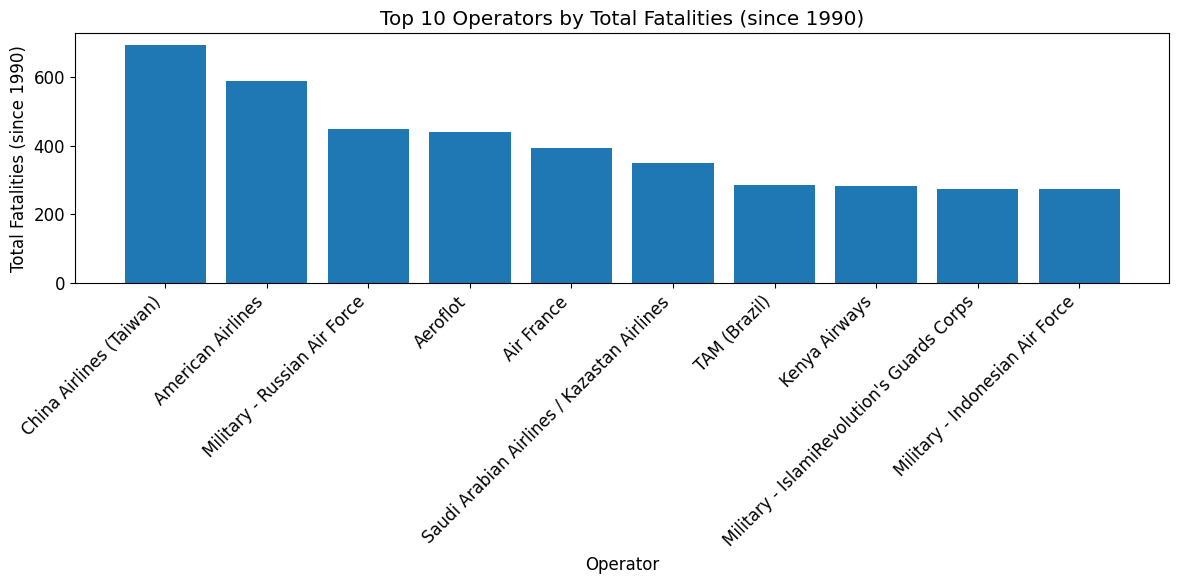

In [53]:
df_1990 = df[df['Year'] >= 1990]
top10_operators_1990 = df_1990.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10_operators_1990.index, top10_operators_1990.values)
plt.xlabel("Operator")
plt.ylabel("Total Fatalities (since 1990)")
plt.title("Top 10 Operators by Total Fatalities (since 1990)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

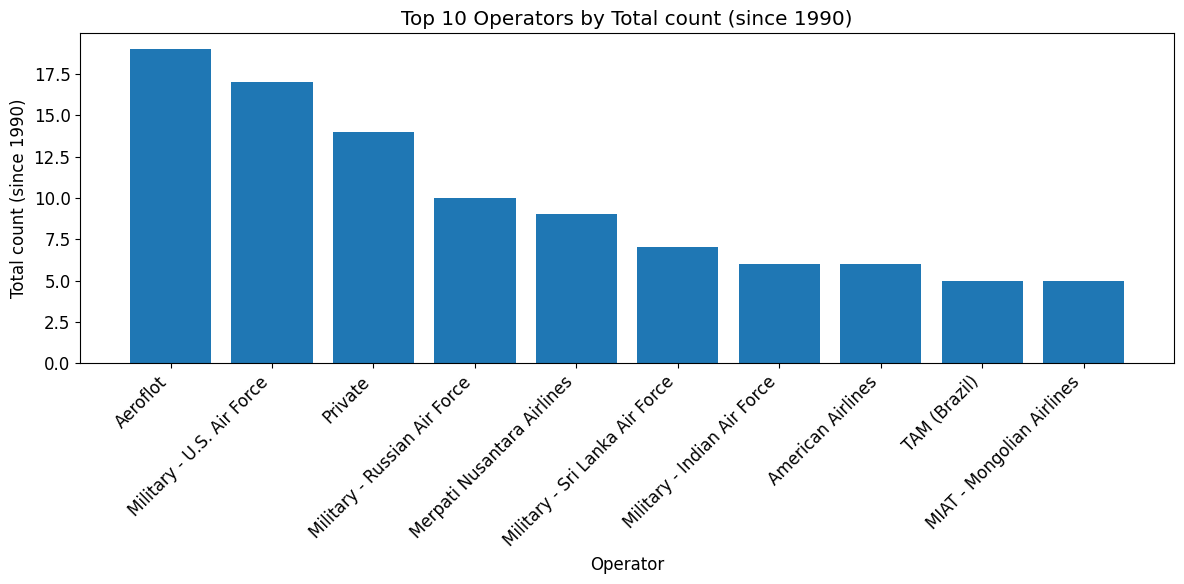

In [54]:
df_1990 = df[df['Year'] >= 1990]
top10_operators_1990 = df_1990.groupby('Operator')['Fatalities'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10_operators_1990.index, top10_operators_1990.values)
plt.xlabel("Operator")
plt.ylabel("Total count (since 1990)")
plt.title("Top 10 Operators by Total count (since 1990)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Based only on this data, it's hard to make a definite conclusion. In recent decades, China Airlines has had the highest number of fatalities, according to external sources. But they have far fewer flights than Aeroflot, so I want to take a closer look at them to give the most accurate answer

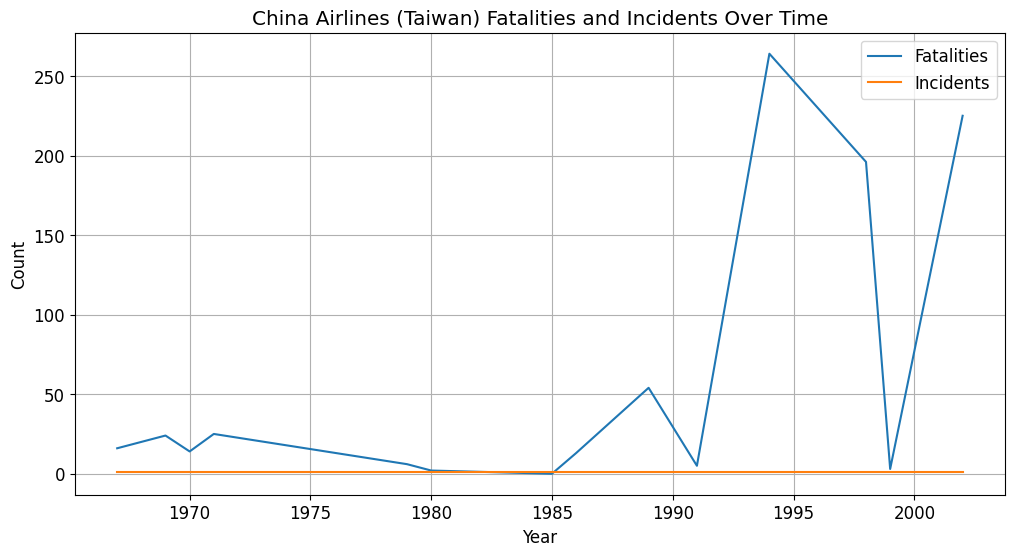

In [55]:
china_airlines_data = df[df['Operator'] == 'China Airlines (Taiwan)']
china_airlines_fatalities = china_airlines_data.groupby('Year')['Fatalities'].sum()
china_airlines_incidents = china_airlines_data.groupby('Year')['Date'].count()
plt.figure(figsize=(12, 6))
plt.plot(china_airlines_fatalities.index, china_airlines_fatalities.values, label='Fatalities')
plt.plot(china_airlines_incidents.index, china_airlines_incidents.values, label='Incidents')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("China Airlines (Taiwan) Fatalities and Incidents Over Time")
plt.legend()
plt.grid(True)
plt.show()


This chart clearly shows that it's a false lead. Despite a few major incidents in the '90s, the airline now looks safe, with incidents being rare. <br>
There's one more lead left. As mentioned earlier, Aeroflot was a monopoly for a long time, but that wasn’t the case in all countries. Just in case, let's try evaluating risks by country.

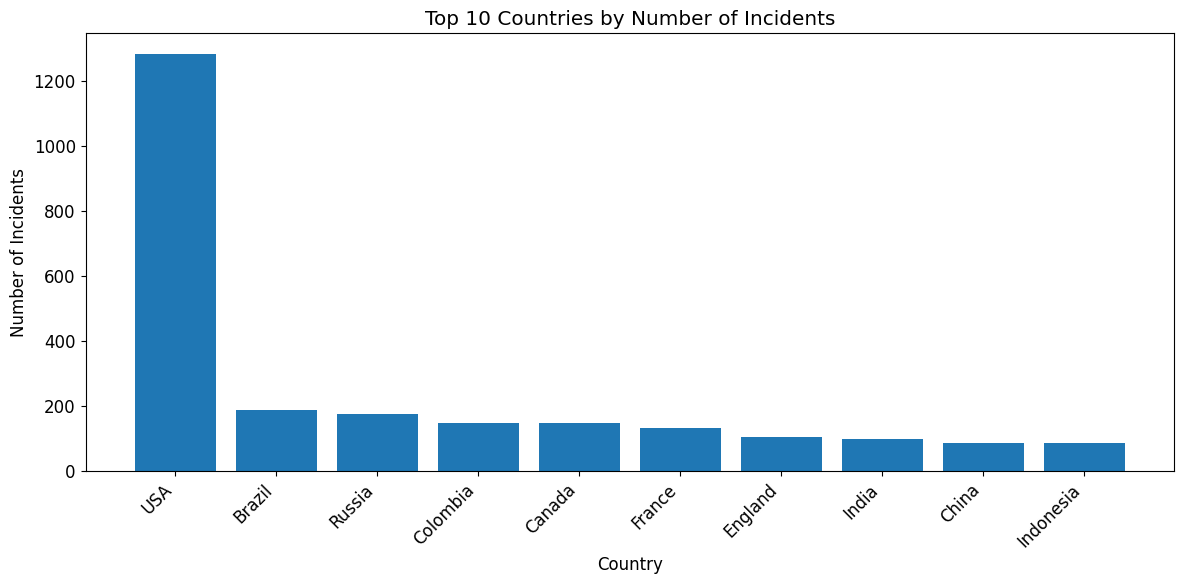

In [56]:
top10_countries = df.groupby('Country')['Date'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10_countries.index, top10_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Incidents")
plt.title("Top 10 Countries by Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


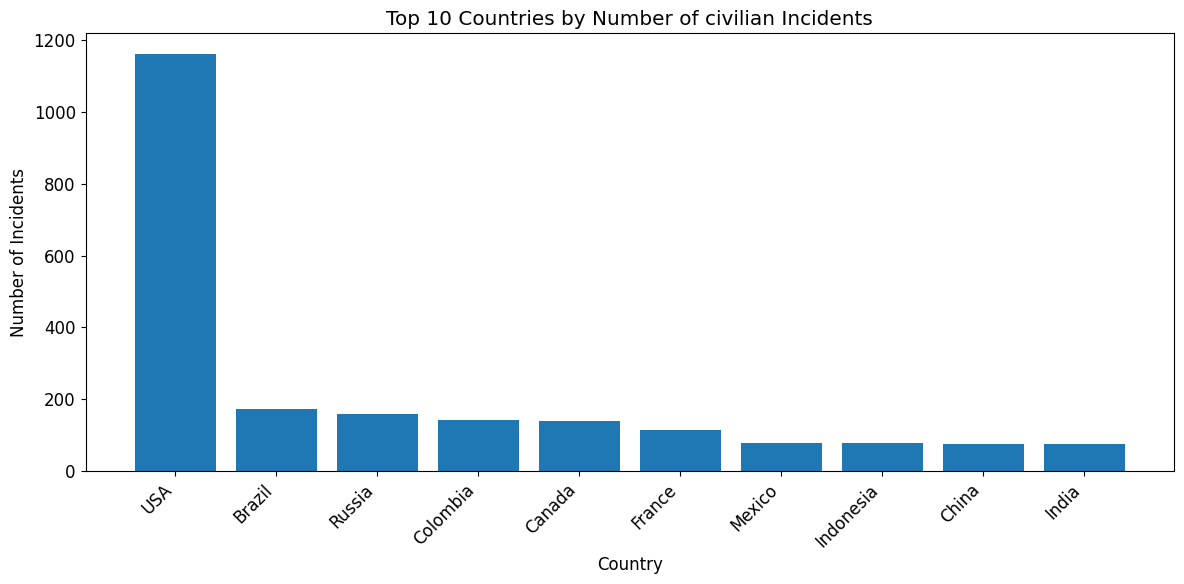

In [57]:
civilian_df = df[df['Military'] == False]
top10_countries = civilian_df.groupby('Country')['Date'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10_countries.index, top10_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Incidents")
plt.title("Top 10 Countries by Number of civilian Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [58]:
usa_crashes = df[df['Country'] == 'USA']
operator_crashes_fatalities = usa_crashes.groupby('Operator').agg({'Date': 'count', 'Fatalities': 'sum'})
top10_operators_usa = operator_crashes_fatalities.sort_values('Date', ascending=False).head(10)
top10_operators_usa

,Date,Fatalities
Operator,,
Military - U.S. Air Force,62,1035.0
United Air Lines,42,981.0
Air Taxi,36,129.0
US Aerial Mail Service,32,36.0
American Airlines,30,1074.0
Private,19,68.0
Trans Continental and Western Air,16,120.0
Northwest Orient Airlines,16,378.0
Military - U.S. Navy,14,330.0


In [59]:
aeroflot_data = df[df['Operator'] == 'Aeroflot']
total_aeroflot_incidents = len(aeroflot_data)
total_aeroflot_fatalities = aeroflot_data['Fatalities'].sum()

print(f"Total Incidents: {total_aeroflot_incidents}")
print(f"Total Fatalities: {total_aeroflot_fatalities}")

Total Incidents: 179
Total Fatalities: 7156.0


Actually, while it's tempting to use this statistic, it's important to remember that we're dealing with absolute, not relative numbers. The dataset doesn't include the total number of flights or the percentage of crashes relative to them. Even though most incidents occurred in the U.S., they are spread across many operators, with none standing out as the worst.

In the end, despite significant improvements after the collapse of the USSR, I believe **Aeroflot** remains the most dangerous operator.

# Summary Analysis
Let's fill in the missing values with "Unknown" and try generating a word cloud.

In [60]:
df['Summary'].fillna('Unknown',inplace=True)
text = ' '.join(df['Summary'])

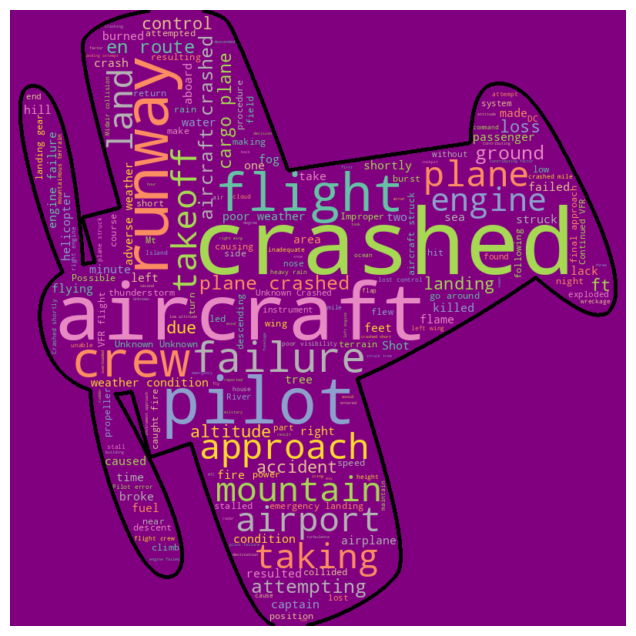

In [61]:
from PIL import Image
from wordcloud import WordCloud
mask = np.array(Image.open("/content/plane.png"))

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='purple',
    mask=mask,
    contour_color='black',
    contour_width=5,
    colormap='Set2'
).generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# b.	Identification of the most often crash cause. K-means

In [62]:
df['Summary'] = df['Summary'].str.lower()

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(df['Summary'])

K-means

In [64]:
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

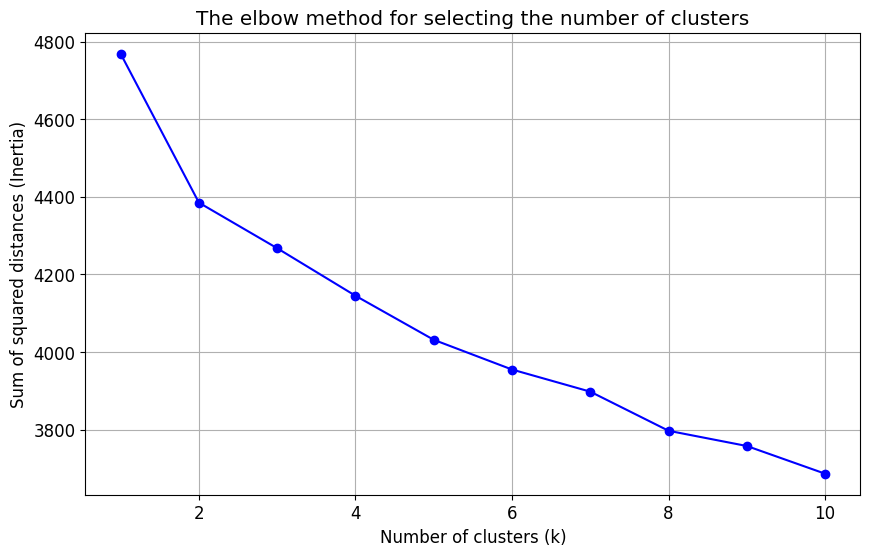

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', color='blue')
plt.title('The elbow method for selecting the number of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.grid(True)
plt.show()

In [66]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

In [67]:
feature_names = vectorizer.get_feature_names_out()
cluster_labels = {}
for i in range(optimal_k):
    top_words = [feature_names[idx] for idx in np.argsort(kmeans.cluster_centers_[i])[-5:]]
    print(f"Cluster {i}: top-words — {top_words}")
df['Cause'] = df['Cluster'].map(cluster_labels)

Cluster 0: top-words — ['approach', 'runway', 'pilot', 'crashed', 'aircraft']
Cluster 1: top-words — ['crashed', 'poor', 'conditions', 'weather', 'mountain']
Cluster 2: top-words — ['sea', 'descent', 'crashed', 'cause', 'unknown']
Cluster 3: top-words — ['mountain', 'plane', 'crashed', 'en', 'route']
Cluster 4: top-words — ['land', 'cargo', 'taking', 'plane', 'crashed']
Cluster 5: top-words — ['aircraft', 'failure', 'crashed', 'engine', 'takeoff']


In [68]:
cluster_labels = {
    0: "Pilot-related issues",
    1: "Weather",
    2: "Crashes into Sea",
    3: "Crashes into Mountain",
    4: "Landing issues",
    5: "Engine failure"
}
df['Cause'] = df['Cluster'].map(cluster_labels)

In [69]:
cause_counts = df['Cause'].value_counts()

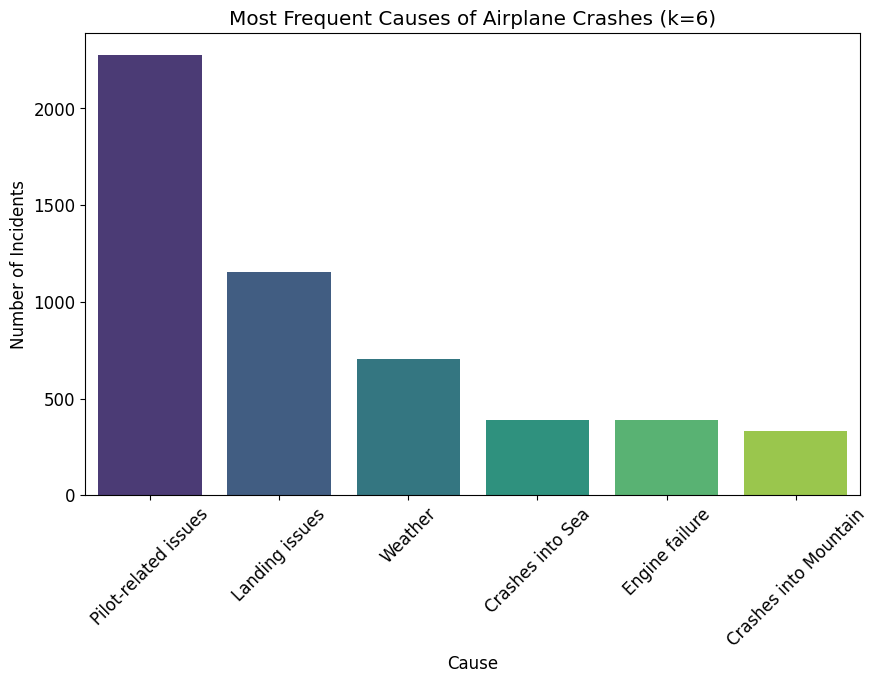

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='viridis')
plt.title('Most Frequent Causes of Airplane Crashes (k=6)')
plt.xlabel('Cause')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [71]:
print("Most frequent cause:", cause_counts.idxmax(), "—", cause_counts.max(), "incidents")

Most frequent cause: Pilot-related issues — 2275 incidents


# Most frequent cause: Pilot-related issues — 2275 incidents

# c.	Is the most often crash cause the most dangerous one as well? If not which one is the most dangerous?

In [72]:
cause_stats = df.groupby('Cause').agg({'Fatalities': 'sum', 'Cluster': 'count'}).rename(columns={'Cluster': 'Count'})
cause_stats['Fatality_Rate'] = cause_stats['Fatalities'] / cause_stats['Count']
cause_stats

,Fatalities,Count,Fatality_Rate
Cause,,,
Crashes into Mountain,5642.0,333,16.942943
Crashes into Sea,3053.0,391,7.808184
Engine failure,8136.0,387,21.023256
Landing issues,18090.0,1155,15.662338
Pilot-related issues,58321.0,2275,25.635604
Weather,12046.0,707,17.038190


In [73]:
most_frequent = cause_counts.idxmax()
most_deadly_total = cause_stats['Fatalities'].idxmax()
most_deadly_rate = cause_stats['Fatality_Rate'].idxmax()

print(f"Most frequent cause: {most_frequent} — {cause_counts.max()} incidents")
print(f"Most deadly (total fatalities): {most_deadly_total} — {cause_stats['Fatalities'].max()} deaths")
print(f"Most deadly (fatality rate): {most_deadly_rate} — {cause_stats['Fatality_Rate'].max():.2f} deaths per incident")

Most frequent cause: Pilot-related issues — 2275 incidents
Most deadly (total fatalities): Pilot-related issues — 58321.0 deaths
Most deadly (fatality rate): Pilot-related issues — 25.64 deaths per incident


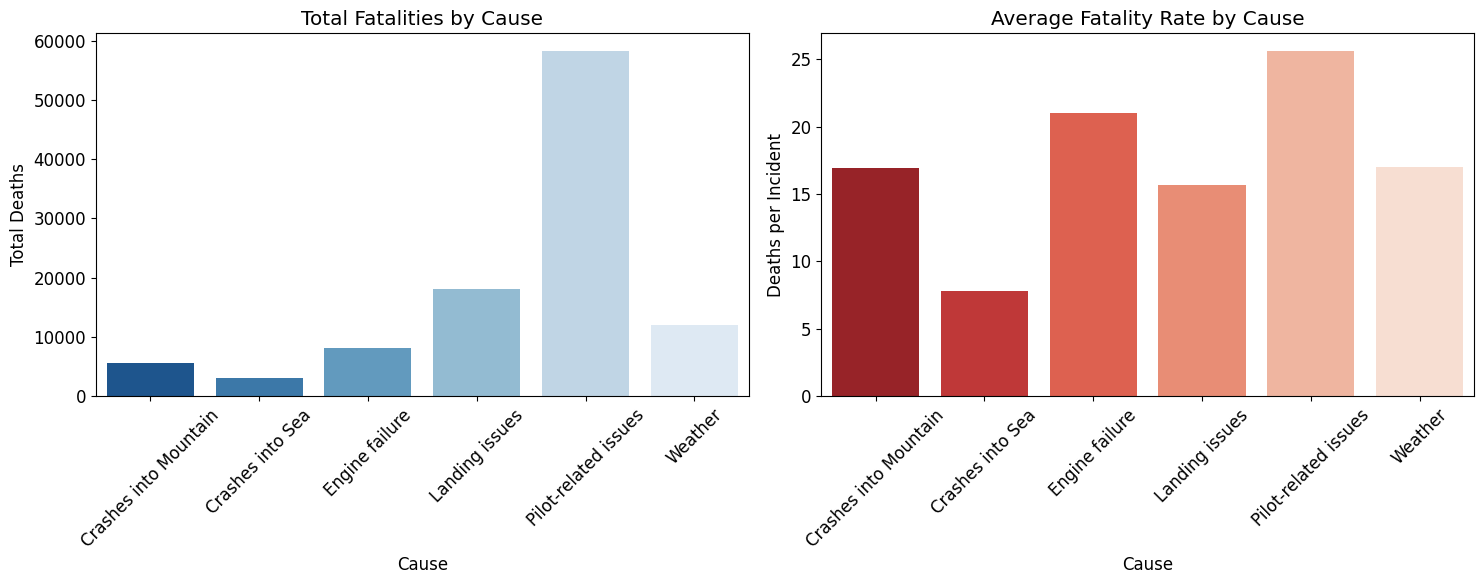

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Total fatalities
sns.barplot(x=cause_stats.index, y=cause_stats['Fatalities'], palette='Blues_r', ax=ax1)
ax1.set_title('Total Fatalities by Cause')
ax1.set_xlabel('Cause')
ax1.set_ylabel('Total Deaths')
ax1.tick_params(axis='x', rotation=45)

# Fatality rate
sns.barplot(x=cause_stats.index, y=cause_stats['Fatality_Rate'], palette='Reds_r', ax=ax2)
ax2.set_title('Average Fatality Rate by Cause')
ax2.set_xlabel('Cause')
ax2.set_ylabel('Deaths per Incident')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Conclusion:
Based on the data and clustering, both total fatalities and average fatalities per incident are highest in the pilot error cluster. Given that in all other clusters where the pilot is not mentioned, some percentage of errors can still be attributed to human factors, we can fairly confidently state that the most frequent cluster is also the deadliest.

# d.	Which variable (day / night, season of the year …)  is the most important for prediction crash cause?

The target variable is the cause of the crash, represented as clusters (the "Cause" column). Our task is to determine which of the available variables (e.g., day/night or season) is the most informative for predicting these causes.

We'll need some additional feature engineering

In [75]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Date'].dt.month.apply(get_season)

In [76]:
df['Time'] = df['Time'].fillna('00:00')
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df ['Time'].str.replace('c:', '')
df['Time'] = df ['Time'].str.replace('c', '')
df['Time'] = df ['Time'].str.replace('12\'20', '12:20')
df['Time'] = df ['Time'].str.replace('18.40', '18:40')
df['Time'] = df ['Time'].str.replace('0943', '09:43')
df['Time'] = df ['Time'].str.replace('22\'08', '22:08')
df['Time'] = df ['Time'].str.replace('114:20', '00:00')

In [77]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [78]:
def get_day_night(time):
    if time >= pd.to_datetime('06:00').time() and time < pd.to_datetime('18:00').time():
        return 'Day'
    else:
        return 'Night'

df['Day_Night'] = df['Time'].apply(get_day_night)

In [79]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Military,Year,Country,Cluster,Cause,Season,Day_Night
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"during a demonstration flight, a u.s. army fly...",True,1908,USA,0,Pilot-related issues,Autumn,Day
1,1912-07-12,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,first u.s. dirigible akron exploded just offsh...,True,1912,USA,0,Pilot-related issues,Summer,Day
2,1913-08-06,00:00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,the first fatal airplane accident in canada oc...,False,1913,Canada,0,Pilot-related issues,Summer,Night
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,the airship flew into a thunderstorm and encou...,True,1913,OvertheNorthSea,0,Pilot-related issues,Autumn,Night
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,hydrogen gas which was being vented was sucked...,True,1913,Germany,0,Pilot-related issues,Autumn,Day


In [93]:
categorical_features = ['Season', 'Day_Night', 'Operator', 'Type', 'Route', 'Location', 'Military']
numeric_features = ['Year', 'Aboard', 'Fatalities', 'Ground']
X = df[categorical_features + numeric_features]
y = df['Cause']

In most cases, missing values make up only a small portion of the overall data, so we can fill them in fairly freely. However, I'll try to do it as accurately as possible.










In [98]:
X.isna().sum()

,0
Season,0
Day_Night,0
Operator,0
Type,0
Route,0
Location,0
Military,0
Year,0
Aboard,0
Fatalities,0


In [96]:
X['Ground'].fillna(X['Ground'].mean(),inplace=True)
X['Fatalities'].fillna(X['Fatalities'].mean(),inplace=True)
X['Aboard'].fillna(X['Aboard'].mean(),inplace=True)
X['Military'].fillna(False,inplace=True)
X['Route'].fillna('Unknown', inplace=True)
X['Type'].fillna(X['Type'].mode()[0],inplace=True)
top_operators = X['Operator'].value_counts().nlargest(10).index
X['Operator'] = X['Operator'].apply(lambda x: x if x in top_operators else 'Other')

In [97]:
X.head(5)

,Season,Day_Night,Operator,Type,Route,Location,Military,Year,Aboard,Fatalities,Ground
0,Autumn,Day,Other,Wright Flyer III,Demonstration,"Fort Myer, Virginia",True,1908,2.0,1.0,0.0
1,Summer,Day,Other,Dirigible,Test flight,"AtlantiCity, New Jersey",True,1912,5.0,5.0,0.0
2,Summer,Night,Other,Curtiss seaplane,Unknown,"Victoria, British Columbia, Canada",False,1913,1.0,1.0,0.0
3,Autumn,Night,Other,Zeppelin L-1 (airship),Unknown,Over the North Sea,True,1913,20.0,14.0,0.0
4,Autumn,Day,Other,Zeppelin L-2 (airship),Unknown,"Near Johannisthal, Germany",True,1913,30.0,30.0,0.0


To answer our question, I'll use a Random Forest, as we have structured data, and I consider it the best choice.

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [100]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [101]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Season', 'Day_Night',
                                                   'Operator', 'Type', 'Route',
                                                   'Location', 'Military']),
                                                 ('num', StandardScaler(),
                                                  ['Year', 'Aboard',
                                                   'Fatalities', 'Ground'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [102]:
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.51


An accuracy of 0.5 doesn't look impressive, BUT it's not just random guessing. We have six possible outcomes, and random guessing would give an accuracy of around 16.7%, not 50%. So, while it may not be enough for precise prediction, it should be sufficient for determining the importance of variables.

In [103]:
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top 10 features:")
print(importance_df.head(10))

Top 10 features:
                   Feature  Importance
8222             num__Year    0.051544
8223           num__Aboard    0.042074
8224       num__Fatalities    0.037678
4568    cat__Route_Unknown    0.016582
4       cat__Day_Night_Day    0.007721
0       cat__Season_Autumn    0.007456
3       cat__Season_Winter    0.007117
1       cat__Season_Spring    0.006863
2       cat__Season_Summer    0.006843
5     cat__Day_Night_Night    0.005874


The most important factor in determining the cause of a crash is the year. The dataset shows that in the past, when air traffic was growing significantly but safety measures and systems had not yet been fully developed, the number of crashes was at its highest.

In second and third place are the number of people on board and the number of fatalities—large and small aircraft tend to experience different types of accidents.

Next comes the "Unknown" route type, which we introduced ourselves, so it’s not a reliable factor, though it still provides some insight.

Among the seasons, autumn has the greatest influence on the cause of crashes, while summer has the least.